In [1]:
# set up environment
import numpy as np
import pandas as pd
import os
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# get current working directory
os.getcwd()
# change working directory
os.chdir('C:/Users/justi/Documents/GitHub/olist/data')
os.getcwd()
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
customers = pd.read_csv('olist_customers_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
translation = pd.read_csv('product_category_name_translation.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')


In [3]:
the_df = {'customers': customers,
              'items': items, 
              'payments': payments, 
              'orders': orders, 
              'products': products, 
              'sellers': sellers, 
              'reviews': reviews,
              'categories': translation,
              'geolocation': geolocation}
print("_______________________________________________________________________________________________")
print("Description of the {} dataframes".format(len(the_df)))
print("_______________________________________________________________________________________________")
for i, j in the_df.items():
    print('{} dataframe:      {} rows and {} columns'.format(str(i),j.shape[0],j.shape[1]))
    print(list(j.columns))
    print("")
print("________________________________________________________________________________________________")

_______________________________________________________________________________________________
Description of the 9 dataframes
_______________________________________________________________________________________________
customers dataframe:      99441 rows and 5 columns
['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']

items dataframe:      112650 rows and 7 columns
['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']

payments dataframe:      103886 rows and 5 columns
['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']

orders dataframe:      99441 rows and 8 columns
['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

products dataframe:      32951 rows and 9 columns
['product_id', 'product_category_n

In [4]:
# get data from github repo on hard disk
olist = pd.merge(orders, customers, on="customer_id")
olist = olist.merge(items, on='order_id')
olist = olist.merge(payments, on="order_id")
olist = olist.merge(sellers, on='seller_id')
olist = olist.merge(products, on='product_id')
olist = olist.merge(translation, on='product_category_name')
olist = olist.merge(reviews, on='order_id')


In [5]:
olist.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 116581 entries, 0 to 116580
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       116581 non-null  object 
 1   customer_id                    116581 non-null  object 
 2   order_status                   116581 non-null  object 
 3   order_purchase_timestamp       116581 non-null  object 
 4   order_approved_at              116567 non-null  object 
 5   order_delivered_carrier_date   115368 non-null  object 
 6   order_delivered_customer_date  114066 non-null  object 
 7   order_estimated_delivery_date  116581 non-null  object 
 8   customer_unique_id             116581 non-null  object 
 9   customer_zip_code_prefix       116581 non-null  int64  
 10  customer_city                  116581 non-null  object 
 11  customer_state                 116581 non-null  object 
 12  order_item_id                 

In [6]:
olist.head(5)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,19.0,8.0,13.0,housewares,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,19.0,8.0,13.0,housewares,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,19.0,8.0,13.0,housewares,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,...,19.0,8.0,13.0,housewares,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,...,19.0,8.0,13.0,housewares,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23


In [7]:
#changing attributes data types
continuous_features = ['price','freight_value', 'payment_sequential','payment_installments','payment_value',
                      'product_name_lenght','product_description_lenght', 'product_photos_qty','product_weight_g',
                      'product_length_cm','product_height_cm','product_width_cm', 'review_score'] 

cat_features = ['order_status', 'customer_city', 'customer_state', 'customer_zip_code_prefix', 'seller_zip_code_prefix', 
                'seller_city', 'seller_state', 'product_category_name','product_category_name_english','review_id',
               'review_comment_title','review_comment_message','payment_type',
               'order_item_id', 'product_id','seller_id','order_id', 'customer_id','customer_unique_id'] 

date_features = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date',
                 'order_estimated_delivery_date', 'shipping_limit_date', 'review_creation_date', 'review_answer_timestamp'] 


In [8]:
# use the "astype" function to change the variable type
olist[continuous_features] = olist.copy()[continuous_features].astype(np.float64)
olist[cat_features] = olist.copy()[cat_features].astype("category")


olist.info() # now our data looks better!!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116581 entries, 0 to 116580
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   order_id                       116581 non-null  category
 1   customer_id                    116581 non-null  category
 2   order_status                   116581 non-null  category
 3   order_purchase_timestamp       116581 non-null  object  
 4   order_approved_at              116567 non-null  object  
 5   order_delivered_carrier_date   115368 non-null  object  
 6   order_delivered_customer_date  114066 non-null  object  
 7   order_estimated_delivery_date  116581 non-null  object  
 8   customer_unique_id             116581 non-null  category
 9   customer_zip_code_prefix       116581 non-null  category
 10  customer_city                  116581 non-null  category
 11  customer_state                 116581 non-null  category
 12  order_item_id   

In [9]:
# fix dates

for i in date_features:
    olist.loc[:,i] = pd.to_datetime(olist.copy().loc[:,i], errors="coerce")


In [10]:
olist.info() # now our data looks better!!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116581 entries, 0 to 116580
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       116581 non-null  category      
 1   customer_id                    116581 non-null  category      
 2   order_status                   116581 non-null  category      
 3   order_purchase_timestamp       116581 non-null  datetime64[ns]
 4   order_approved_at              116567 non-null  datetime64[ns]
 5   order_delivered_carrier_date   115368 non-null  datetime64[ns]
 6   order_delivered_customer_date  114066 non-null  datetime64[ns]
 7   order_estimated_delivery_date  116581 non-null  datetime64[ns]
 8   customer_unique_id             116581 non-null  category      
 9   customer_zip_code_prefix       116581 non-null  category      
 10  customer_city                  116581 non-null  category      
 11  

In [34]:
olist.dtypes


order_id                               category
customer_id                            category
order_status                           category
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
customer_unique_id                     category
customer_zip_code_prefix               category
customer_city                          category
customer_state                         category
order_item_id                          category
product_id                             category
seller_id                              category
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
payment_sequential                      float64
payment_type                           category
payment_installments                    

In [11]:
# count NAs in the dataframe by column
olist.isnull().sum()


order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1213
order_delivered_customer_date      2515
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
seller_zip_code_prefix                0
seller_city                           0
seller_state                          0


In [12]:
# which rows have NAs - specifically those with just 3, I am thinking they are the same rows
olist[olist['product_weight_g'].isnull()]


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
10701,85f8ad45e067abd694b627859fa57453,1d088dea8732788ec35dd4ee6dd76112,delivered,2017-01-29 21:40:02,2017-01-30 22:32:20,2017-02-02 05:04:58,2017-02-07 10:46:00,2017-03-08,69b2b29382af03e03e486ad307a76000,90160,...,NaN,NaN,NaN,baby,125af5098b160c059cd60bafcc1f6ad1,5.0,NaN,NaN,2017-02-08,2017-02-09 10:09:24


In [13]:
# let's remove the 1 row with no product weight, height, etc information since we have plenty of other data to work with
# drop function axis=0 is rows axis=1 is columns
olist = olist.drop([10701],axis=0)

In [14]:
olist.isnull().sum()
#looks like a lot of missing data information, comments (no surprise), category names

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1213
order_delivered_customer_date      2515
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
seller_zip_code_prefix                0
seller_city                           0
seller_state                          0


In [38]:
# what are those 14 missing values for order_approved_at?
missing_approved = olist[olist['order_approved_at'].isnull()]
missing_approved
# they all show to be delivered

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_width_cm,product_category_name_english,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,purchase_wk_day,purchase_month
11979,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31,7e1a5ca61b572d76b64b6688b9f96473,62700,...,15.0,cool_stuff,4930703ae4fccd4d2d3b44cf63a9e632,5.0,NaN,NaN,2017-03-10,2017-03-13 00:18:46,Saturday,February
11981,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20,c8822fce1d0bfa7ddf0da24fff947172,27945,...,15.0,cool_stuff,4e44dd381f3c4f7afddacf8b9aa0c47a,5.0,NaN,NaN,2017-03-03,2017-03-04 00:06:38,Friday,February
12058,2babbb4b15e6d2dfe95e2de765c97bce,74bebaf46603f9340e3b50c6b086f992,delivered,2017-02-18 17:15:03,NaT,2017-02-22 11:23:11,2017-03-03 18:43:43,2017-03-31,f79be7c08dd24b72d34634f1b89333a4,65110,...,15.0,cool_stuff,da0dc17903d0f8aa4b041dcd7f2dacff,4.0,NaN,"Além do produto chegar antes do previsto, a qu...",2017-03-04,2017-03-06 23:20:42,Saturday,February
15899,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01,6ff8b0d7b35d5c945633b8d60165691b,11030,...,21.0,sports_leisure,a8353da830468c234d99152e0b714fed,4.0,NaN,Bom custo x benefício pra proteger o crânio da...,2017-02-01,2017-02-03 11:18:15,Thursday,January
22637,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22,c4c0011e639bdbcf26059ddc38bd3c18,13225,...,15.0,sports_leisure,ce1c8f5c23a5b96c8d27878e666ad3f2,5.0,NaN,"o produto chegou antes do prazo, é muito bom",2017-03-04,2017-06-20 23:17:56,Saturday,February
32143,51eb2eebd5d76a24625b31c33dd41449,07a2a7e0f63fd8cb757ed77d4245623c,delivered,2017-02-18 15:52:27,NaT,2017-02-23 03:09:14,2017-03-07 13:57:47,2017-03-29,79af1bbf230a2630487975aa5d7d6220,37660,...,20.0,furniture_decor,6352329f467fe888f25b35e48b11b97e,5.0,NaN,NaN,2017-03-09,2017-03-09 08:14:03,Saturday,February
32351,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaT,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16,d49f3dae6bad25d05160fc17aca5942d,36400,...,20.0,furniture_decor,24f83e3e2c75b58888eec93ab93f2cca,2.0,NaN,Não gostei. O material não é tão bom. A cor do...,2017-02-07,2017-02-10 10:20:44,Thursday,January
32434,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27,2e0a2166aa23da2472c6a60c4af6f7a6,3573,...,23.0,furniture_decor,6540ad5bc5a8bfc9ede2d495bfb940dd,5.0,NaN,Excelente produto,2017-03-03,2017-03-04 21:06:06,Sunday,February
78778,88083e8f64d95b932164187484d90212,f67cd1a215aae2a1074638bbd35a223a,delivered,2017-02-18 22:49:19,NaT,2017-02-22 11:31:06,2017-03-02 12:06:06,2017-03-21,bc1896dc77f49e6dec880445a9b443a3,21020,...,28.0,telephony,331c2fea3f2c1512a9ca1889436a6904,4.0,NaN,O serviço do site dessa vez foi otimo. \r\nEm ...,2017-03-03,2017-03-04 03:45:57,Saturday,February
78779,88083e8f64d95b932164187484d90212,f67cd1a215aae2a1074638bbd35a223a,delivered,2017-02-18 22:49:19,NaT,2017-02-22 11:31:06,2017-03-02 12:06:06,2017-03-21,bc1896dc77f49e6dec880445a9b443a3,21020,...,28.0,telephony,331c2fea3f2c1512a9ca1889436a6904,4.0,NaN,O serviço do site dessa vez foi otimo. \r\nEm ...,2017-03-03,2017-03-04 03:45:57,Saturday,February


In [45]:
# looks like we can impute those values...let's see what the average time is between and order purchase and approval
purchase_to_approve = olist[['order_purchase_timestamp','order_approved_at','order_status']]
purchase_to_approve.dtypes

order_purchase_timestamp    datetime64[ns]
order_approved_at           datetime64[ns]
order_status                      category
dtype: object

In [59]:
# let's remove those 14 missing values
purchase_to_approve[purchase_to_approve.order_approved_at.isnull()]

,order_purchase_timestamp,order_approved_at,order_status,pta_time
11979,2017-02-18 16:48:35,NaT,delivered,NaT
11981,2017-02-17 13:05:55,NaT,delivered,NaT
12058,2017-02-18 17:15:03,NaT,delivered,NaT
15899,2017-01-19 12:48:08,NaT,delivered,NaT
22637,2017-02-18 11:04:19,NaT,delivered,NaT
32143,2017-02-18 15:52:27,NaT,delivered,NaT
32351,2017-01-19 22:26:59,NaT,delivered,NaT
32434,2017-02-19 01:28:47,NaT,delivered,NaT
78778,2017-02-18 22:49:19,NaT,delivered,NaT
78779,2017-02-18 22:49:19,NaT,delivered,NaT


In [64]:
# removing na's
purchase_to_approve = purchase_to_approve.dropna(axis=0)

In [65]:
purchase_to_approve[purchase_to_approve.order_approved_at.isnull()].sum()

order_purchase_timestamp    0.0
order_approved_at           0.0
order_status                0.0
pta_time                    0.0
dtype: float64

In [76]:
# let's get some averages
purchase_to_approve['pta_time'] = purchase_to_approve['order_approved_at'] - purchase_to_approve['order_purchase_timestamp']
# convert timedelta to numeric value for averaging
purchase_to_approve['new'] = purchase_to_approve['pta_time'].values.astype(np.int64)                                           

purchase_to_approve


,order_purchase_timestamp,order_approved_at,order_status,pta_time,new
0,2017-10-02 10:56:33,2017-10-02 11:07:15,delivered,00:10:42,642000000000
1,2017-10-02 10:56:33,2017-10-02 11:07:15,delivered,00:10:42,642000000000
2,2017-10-02 10:56:33,2017-10-02 11:07:15,delivered,00:10:42,642000000000
3,2017-08-15 18:29:31,2017-08-15 20:05:16,delivered,01:35:45,5745000000000
4,2017-08-02 18:24:47,2017-08-02 18:43:15,delivered,00:18:28,1108000000000
...,...,...,...,...,...
116576,2017-08-12 19:20:39,2017-08-12 19:30:17,delivered,00:09:38,578000000000
116577,2017-07-31 18:10:29,2017-07-31 18:25:20,delivered,00:14:51,891000000000
116578,2017-07-31 18:10:29,2017-07-31 18:25:20,delivered,00:14:51,891000000000
116579,2017-07-11 10:45:57,2017-07-11 10:55:14,delivered,00:09:17,557000000000


In [83]:
# average time to approve purchase from order
avg_time_to_app = purchase_to_approve['new'].sum()/purchase_to_approve['new'].count()
avg_time_to_app
pd.to_timedelta(avg_time_to_app)
# looks like about 10.5 hours is the average so we can just copy the purchase time stamp to the approved for those 14

Timedelta('0 days 10:30:07.446734')

In [91]:

olist.order_approved_at = olist.order_approved_at.fillna(olist.order_purchase_timestamp) #fill in missing values if indices match


In [92]:
olist.isnull().sum()
# and that is fixed!

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                     0
order_delivered_carrier_date       1213
order_delivered_customer_date      2515
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
seller_zip_code_prefix                0
seller_city                           0
seller_state                          0


In [15]:
# what is going on with those delivery dates missing?
delivery_na = olist[olist['order_delivered_customer_date'].isnull()]

# let's see the unique values of order status for deliveries that are listed as NaN
delivery_na['order_status'].unique()

[shipped, canceled, invoiced, processing, approved, unavailable, delivered]
Categories (7, object): [shipped, canceled, invoiced, processing, approved, unavailable, delivered]

In [16]:
# create a boolean variable to filter the the order_delivery NaNs by orders that were cancelled
is_canceled = delivery_na['order_status'] == "canceled"

#filter the dataframe by the cancelled orders
no_delivery = delivery_na[is_canceled]

#show how many orders were cancelled
print(no_delivery.shape)
# 546 orders were cancelled and never delivered

(546, 40)


In [17]:
# looking at a sample of the cancelled orders
no_delivery.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
511,5f0dfd096a455e93ffb4ee0635b32264,b03efbab821a8ef7b3e6b2a75ec7d74d,canceled,2018-07-29 15:15:39,2018-07-29 15:25:09,NaT,NaT,2018-08-02,5946c7eb7093ad678e3510213f1b6f09,2250,...,16.0,5.0,12.0,housewares,95c7c13cf2056bf0cca12834803a80a6,4.0,NaN,NaN,2018-08-04,2018-08-06 11:00:22
930,013e9c654a339d80b53513da3c1ea437,9391729f79cd9e5fd7ca884ca030f579,canceled,2017-06-18 13:48:48,2017-06-18 13:55:18,NaT,NaT,2017-07-07,05a3b50193563913613acada5c86b1d2,18710,...,39.0,6.0,28.0,housewares,ca13795db8e305829cb406ef608d87f9,1.0,NaN,Recebi um comunicado que não teria o produto n...,2017-07-09,2017-07-09 13:34:47
1022,0148d3df00cebda592d4e5f966e300cc,672510553bcfbf72de694db2cd88f046,canceled,2017-08-19 19:08:26,2017-08-19 19:24:32,NaT,NaT,2017-09-11,e75fd09539dff5c7c80a12781404ffea,4078,...,28.0,17.0,11.0,housewares,8d697839be8221452e9d4f96347d0612,1.0,NaN,PRODUTO NÃO RECEBIDO,2017-09-13,2017-09-13 16:23:19
1023,0148d3df00cebda592d4e5f966e300cc,672510553bcfbf72de694db2cd88f046,canceled,2017-08-19 19:08:26,2017-08-19 19:24:32,NaT,NaT,2017-09-11,e75fd09539dff5c7c80a12781404ffea,4078,...,28.0,17.0,11.0,housewares,8d697839be8221452e9d4f96347d0612,1.0,NaN,PRODUTO NÃO RECEBIDO,2017-09-13,2017-09-13 16:23:19
1024,0148d3df00cebda592d4e5f966e300cc,672510553bcfbf72de694db2cd88f046,canceled,2017-08-19 19:08:26,2017-08-19 19:24:32,NaT,NaT,2017-09-11,e75fd09539dff5c7c80a12781404ffea,4078,...,28.0,17.0,11.0,housewares,8d697839be8221452e9d4f96347d0612,1.0,NaN,PRODUTO NÃO RECEBIDO,2017-09-13,2017-09-13 16:23:19


In [18]:
# create boolean variable for orders that were unavailable
is_unavail = delivery_na['order_status'] == "unavailable"

#filter by unavailable orders
no_delivery_unavail = delivery_na[is_unavail]

print(no_delivery_unavail.shape)

# 7 orders were not delivered because they were unavailable

no_delivery_unavail.head()

(7, 40)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
10818,2fd1c83dd4714cf3cf796fffb6c8de62,7f51c513004ef3f35e834c142f286778,unavailable,2016-10-05 17:21:29,2016-10-06 15:55:40,NaT,NaT,2016-11-29,30fceee7cb0dbe6926f2b1128f2b3648,31910,...,22.0,20.0,28.0,baby,033baa4238fcac803931108093d2456a,1.0,NaN,Prazo não foi cumprido ... até hoje não chegou...,2016-12-01,2016-12-03 09:21:38
10819,2fd1c83dd4714cf3cf796fffb6c8de62,7f51c513004ef3f35e834c142f286778,unavailable,2016-10-05 17:21:29,2016-10-06 15:55:40,NaT,NaT,2016-11-29,30fceee7cb0dbe6926f2b1128f2b3648,31910,...,33.0,13.0,29.0,baby,033baa4238fcac803931108093d2456a,1.0,NaN,Prazo não foi cumprido ... até hoje não chegou...,2016-12-01,2016-12-03 09:21:38
14898,54bb06e1ca86bd99ee2a8d6288bf4ede,98bfbf477ed9f40a0264f5e527a446be,unavailable,2016-10-06 13:38:39,2016-10-06 14:22:19,NaT,NaT,2016-12-12,8aa802da0f525a68e7fae5e67929ebdd,18147,...,20.0,30.0,40.0,cool_stuff,50c851bd79dc0b19f3d9c523ca747df8,1.0,NaN,"Produto não entregue, demoraram mais de um mês...",2016-12-14,2016-12-16 09:34:47
38978,1a47da1d66c70489c8e35fe2b5433ab7,3d8e326c3cef3a9bba7ca121baac5fc3,unavailable,2016-10-07 18:16:31,2016-10-07 18:53:48,NaT,NaT,2016-12-07,b18b6d40c3c5510727e0f22b568d3e1f,91430,...,22.0,14.0,16.0,perfumery,35fa5e7e3020710116f5ff6df38b2a59,5.0,NaN,NaN,2016-12-09,2016-12-09 11:25:52
39335,4dd47e84e6b8ff4a63d0b8425e6d788e,96bbcbc8372c86da857d842dfda6bd72,unavailable,2016-10-06 23:49:18,2016-10-07 01:09:08,NaT,NaT,2016-11-24,e347a8d0bfec0255258cc913ed28d3a9,28010,...,20.0,17.0,17.0,perfumery,deab3ad3f78fd4ef275d9788978b92c9,1.0,NaN,Em 2 meses de espera não recebi o produto. Div...,2016-11-27,2016-11-28 12:01:22


In [19]:
#how many orders are showing as delivered but no delivery date is recorded?
no_date = delivery_na['order_status'] == 'delivered'
invoiced = delivery_na['order_status'] == 'invoiced'

# filter the dataframe
no_date_delivered = delivery_na[no_date]
no_date_invoiced = delivery_na[invoiced]

print(no_date_delivered.shape)
no_date_delivered



(8, 40)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
23922,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23,d77cf4be2654aa70ef150f8bfec076a6,91330,...,26.0,26.0,26.0,sports_leisure,4e755f114e50d33b9ac6a56e0d7d3ea9,5.0,NaN,NaN,2017-06-25,2017-06-27 01:49:04
28097,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24,ebf7e0d43a78c81991a4c59c145c75db,13560,...,37.0,23.0,27.0,toys,ee2d30652e2f7fc00861074f795f5bf0,5.0,Excelente!,O produto chegou muito antes do prazo previsto...,2018-07-06,2018-07-07 18:48:09
52971,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18,13467e882eb3a701826435ee4424f2bd,18520,...,67.0,10.0,67.0,auto,f48c6c944a5d52dcca8ac5c4ec417cf2,5.0,NaN,Chegou rápido tudo ok,2017-12-19,2017-12-19 04:15:39
63184,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30,1bd06a0c0df8b23dacfd3725d2dc0bb9,12445,...,16.0,14.0,14.0,watches_gifts,25e11638a3d01a87e8e62338a39eee28,5.0,NaN,NaN,2018-07-11,2018-07-11 19:27:46
63192,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30,3bc508d482a402715be4d5cf4020cc81,13170,...,16.0,14.0,14.0,watches_gifts,bb311d9562ecbefc8e4be756d8999892,5.0,NaN,NaN,2018-07-07,2018-07-10 11:38:13
69396,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26,cce5e8188bf42ffb3bb5b18ff58f5965,7261,...,16.0,15.0,20.0,computers_accessories,0d4c56af896dd6eb9de8edbaa1902d22,1.0,Péssimo,Comprei um produto de uma marca e recebi outro...,2018-06-16,2018-06-16 13:55:00
112955,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16,2f17c5b324ad603491521b279a9ff4de,18255,...,36.0,51.0,18.0,industry_commerce_and_business,c0dd6bec0375c376f044af102118526f,5.0,Entrega super rápida.,"Produto novo, muito bom.",2018-06-29,2018-06-29 16:26:37
114295,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19,175378436e2978be55b8f4316bce4811,9431,...,26.0,7.0,36.0,books_general_interest,d055795a562efffefe47ef81e5435322,5.0,Muito bom,Adorei,2018-07-06,2018-07-06 20:30:17


In [20]:
print(no_date_invoiced.shape)
no_date_invoiced

(364, 40)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
762,d02adc4aef085f611aaf9e975642926a,fc78016bbb85f3105bfd610141fde114,invoiced,2017-07-28 13:42:40,2017-07-29 02:24:01,NaT,NaT,2017-08-21,8483dc16ca810a9454e1574f4d60bbf1,38910,...,26.0,47.0,27.0,housewares,eaaa0ed3c5cbb672cbc410b2d501ac20,5.0,NaN,NaN,2017-08-24,2017-08-24 14:09:43
1642,82ba09cde004c6bcefd36545670ac5de,61523d11d253c053d2567669b8e761d6,invoiced,2017-12-05 21:34:58,2017-12-05 21:58:41,NaT,NaT,2017-12-29,bb0b33b8f223581965edf90caccedcfc,6473,...,23.0,5.0,23.0,housewares,b7cc279f0b1f6de66150c86ba0418587,1.0,NaN,NaN,2017-12-31,2018-01-09 21:34:59
1746,f837f3ebff8ee27bdac13d56cb22e5be,20bf7628a9208e11a8d7189b693cbd3f,invoiced,2017-09-21 20:02:44,2017-09-22 20:10:11,NaT,NaT,2017-10-19,ed37d07f39a3fdff8e899ff249c87cee,24942,...,30.0,30.0,30.0,housewares,ce9a0c813c06d3511fa4ad33e704b26e,1.0,NaN,NaN,2017-10-22,2017-10-22 10:45:05
2231,065c05543ebdfd79fb629b2b4a6ab904,51d502a84c571171762fbda013cb4e09,invoiced,2018-03-20 18:02:29,2018-03-20 18:15:27,NaT,NaT,2018-04-02,49db5ff32556ff3ac0123ba825bdff2f,1501,...,32.0,32.0,32.0,housewares,8ed8b84117127bde20d83b08163a485b,5.0,NaN,Satisfatório!,2018-04-04,2018-04-06 14:16:43
2232,065c05543ebdfd79fb629b2b4a6ab904,51d502a84c571171762fbda013cb4e09,invoiced,2018-03-20 18:02:29,2018-03-20 18:15:27,NaT,NaT,2018-04-02,49db5ff32556ff3ac0123ba825bdff2f,1501,...,32.0,32.0,32.0,housewares,8ed8b84117127bde20d83b08163a485b,5.0,NaN,Satisfatório!,2018-04-04,2018-04-06 14:16:43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116390,9d6e7e70e068602fa740fc3163cefd3b,066bab10d1281abb5baefa5d7772cce0,invoiced,2017-10-30 14:25:15,2017-10-31 04:15:15,NaT,NaT,2017-12-29,f8ac33ce25aad89ade14c52fac3cc452,90430,...,40.0,54.0,40.0,furniture_bedroom,699b21c7a26472e4032adf124631dc04,5.0,NaN,NaN,2018-01-04,2018-05-09 11:45:06
116391,9d6e7e70e068602fa740fc3163cefd3b,066bab10d1281abb5baefa5d7772cce0,invoiced,2017-10-30 14:25:15,2017-10-31 04:15:15,NaT,NaT,2017-12-29,f8ac33ce25aad89ade14c52fac3cc452,90430,...,40.0,54.0,40.0,furniture_bedroom,1c9023a88f4effba4abbf114c58bedba,4.0,NaN,NaN,2017-11-09,2017-11-13 23:23:05
116465,10a8ab52ea001eb59beb9c0f97d72eab,7dd6b8c6aa412198c9b992768af8683a,invoiced,2018-08-07 02:42:38,2018-08-07 02:55:15,NaT,NaT,2018-08-16,07d68754c24064a94aba128946c715b3,4746,...,20.0,20.0,20.0,cine_photo,bfe38db9ef7a38ee6aa3dfc1e8c664e6,1.0,PRODUTO NÃO RECEBIDO,O produto não foi recebido além de não ter rec...,2018-08-18,2018-08-18 16:50:30
116512,b5d9716785ce349830c74805f925c745,5f2ff53e9d5e23d67e5245bb3c68d6d0,invoiced,2017-11-16 14:38:35,2017-11-16 14:51:05,NaT,NaT,2017-12-05,009a0802534f904b40b9d512b49794e1,22210,...,33.0,6.0,22.0,books_imported,baea8db447a9994476de5069cc110a32,5.0,NaN,NaN,2017-12-07,2017-12-07 02:55:09


In [21]:
# let's see how many total order by order_status
olist.groupby(by='order_status').count()


,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
order_status,,,,,,,,,,,,,,,,,,,,,
approved,3,3,3,3,0,0,3,3,3,3,...,3,3,3,3,3,3,0,0,3,3
canceled,553,553,553,553,78,7,553,553,553,553,...,553,553,553,553,553,553,86,377,553,553
delivered,114066,114066,114066,114052,114064,114058,114066,114066,114066,114066,...,114066,114066,114066,114066,114066,114066,13662,48222,114066,114066
invoiced,364,364,364,364,0,0,364,364,364,364,...,364,364,364,364,364,364,56,252,364,364
processing,362,362,362,362,0,0,362,362,362,362,...,362,362,362,362,362,362,11,239,362,362
shipped,1225,1225,1225,1225,1225,0,1225,1225,1225,1225,...,1225,1225,1225,1225,1225,1225,181,782,1225,1225
unavailable,7,7,7,7,0,0,7,7,7,7,...,7,7,7,7,7,7,0,6,7,7


We have 2,515 orders missing a customer delivery date. Of those missing delivery dates it appears there were 564 cancelled orders, 7 orders that were unavailable, 8 orders that show as delivered but are missing delivery dates and 364 orders that were invoiced but there is no record of the orders being delivered. Other reasons we don't have delivery data is because at the time the data was pulled, an order could've been shipped, processing or approved or otherwise still in the process of making it's way to the customer. These are just good things to note, we may consider just removing all 2,515 lines since we have so much data already. There were 7 orders that were cancelled, but still delivered and more than likely that's because the order was cancelled after it shipped from the seller.


In [22]:
# start withs some basic plotting
# this python magics will allow plot to be embedded into the notebook
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

In [23]:
#date features: day of week and month of order_purchase using purchase timestamp. Further converted to categorical data type.
olist['purchase_wk_day'] = olist.copy()['order_purchase_timestamp'].dt.day_name().astype('category')


olist['purchase_wk_day'].unique()

[Monday, Tuesday, Wednesday, Thursday, Saturday, Friday, Sunday]
Categories (7, object): [Monday, Tuesday, Wednesday, Thursday, Saturday, Friday, Sunday]

In [24]:
olist['purchase_month'] = olist.copy()['order_purchase_timestamp'].dt.month_name().astype('category')

olist['purchase_month'].unique()

[October, August, September, February, July, ..., December, May, April, January, March]
Length: 12
Categories (12, object): [October, August, September, February, ..., May, April, January, March]

In [25]:
olist['purchase_month'].value_counts()

August       12569
May          12517
July         12108
March        11587
June         11128
April        10977
February      9912
January       9391
November      8963
December      6443
October       5926
September     5059
Name: purchase_month, dtype: int64

In [26]:
olist_sub = olist[['price','purchase_month']]
month_price = olist_sub.groupby(by='purchase_month').sum()
month_price = month_price.sort_values('price')
month_price

,price
purchase_month,
September,658401.79
October,727805.86
December,757114.42
November,1040287.53
January,1095767.47
February,1129239.04
June,1358729.61
March,1402883.58
April,1405827.55


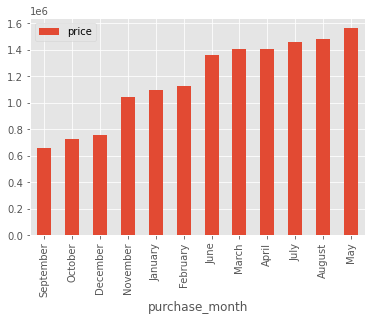

In [27]:
# plot some of these continuous varialbes
plt.style.use('ggplot')


ax = month_price.plot(kind='bar')

In [28]:
order_product = olist[['order_id','product_id','price','freight_value']]
order_product.product_id.unique()
# 32,327 product_ids


[87285b34884572647811a353c7ac498a, be03d93320192443b8fa24c0ca6ead98, d4a3b5aa064bf44e74f1e71862bea22a, 8415b1dae10d2dcb36beec370c6a90cd, 5e18248fc768bdb7fc69fd012068d109, ..., 0c800efe70e04ffcc3b266946e3e4826, 2365562e74dd46f5e99cdc696c504cea, b52e7c92200ed9874e77bc09b5ed4d40, cc9e875c2df286dbed83efe01191162c, 724c49c346d2979339d366fa59ce49de]
Length: 32327
Categories (32327, object): [87285b34884572647811a353c7ac498a, be03d93320192443b8fa24c0ca6ead98, d4a3b5aa064bf44e74f1e71862bea22a, 8415b1dae10d2dcb36beec370c6a90cd, ..., 2365562e74dd46f5e99cdc696c504cea, b52e7c92200ed9874e77bc09b5ed4d40, cc9e875c2df286dbed83efe01191162c, 724c49c346d2979339d366fa59ce49de]

In [29]:
order_product.order_id.unique()
#97,254 unique order_ids


[e481f51cbdc54678b7cc49136f2d6af7, 128e10d95713541c87cd1a2e48201934, 0e7e841ddf8f8f2de2bad69267ecfbcf, bfc39df4f36c3693ff3b63fcbea9e90a, 5f49f31e537f8f1a496454b48edbe34d, ..., 4cbf1cc60a2d1704a70e11ee8be1510a, fbd9022ebf9271e1952ca884a972d1bd, 30b0ea32347476f4b427daf62e09a5bb, 1ce0acf125f1bcd636276dd213363196, c72888e51a36defb7b5d49201fcbccf7]
Length: 97254
Categories (97254, object): [e481f51cbdc54678b7cc49136f2d6af7, 128e10d95713541c87cd1a2e48201934, 0e7e841ddf8f8f2de2bad69267ecfbcf, bfc39df4f36c3693ff3b63fcbea9e90a, ..., fbd9022ebf9271e1952ca884a972d1bd, 30b0ea32347476f4b427daf62e09a5bb, 1ce0acf125f1bcd636276dd213363196, c72888e51a36defb7b5d49201fcbccf7]

In [30]:
# randomly sample data for pairwise plots
olist_sample = olist.sample(n=30000, random_state=1)
olist_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 14600 to 18234
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       30000 non-null  category      
 1   customer_id                    30000 non-null  category      
 2   order_status                   30000 non-null  category      
 3   order_purchase_timestamp       30000 non-null  datetime64[ns]
 4   order_approved_at              29995 non-null  datetime64[ns]
 5   order_delivered_carrier_date   29709 non-null  datetime64[ns]
 6   order_delivered_customer_date  29400 non-null  datetime64[ns]
 7   order_estimated_delivery_date  30000 non-null  datetime64[ns]
 8   customer_unique_id             30000 non-null  category      
 9   customer_zip_code_prefix       30000 non-null  category      
 10  customer_city                  30000 non-null  category      
 11  customer_st

In [31]:
# select just the variables that are numbers from the sample df
olist_continuous = olist_sample.select_dtypes(np.number)
olist_continuous.describe()

,price,freight_value,payment_sequential,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,119.459950,20.072266,1.092467,2.964167,172.130671,48.675567,788.763567,2.213433,2123.190600,30.290700,16.734167,23.210533,4.022267
std,170.657535,15.766011,0.700809,2.787438,266.801102,10.077587,653.627548,1.722260,3768.321173,16.211433,13.572540,11.894643,1.393952
min,1.200000,0.000000,1.000000,0.000000,0.010000,5.000000,8.000000,1.000000,0.000000,7.000000,2.000000,8.000000,1.000000
25%,39.900000,13.030000,1.000000,1.000000,61.177500,42.000000,347.000000,1.000000,300.000000,18.000000,8.000000,15.000000,4.000000
50%,74.900000,16.270000,1.000000,2.000000,108.200000,51.000000,603.000000,1.000000,700.000000,25.000000,13.000000,20.000000,5.000000
75%,134.900000,21.202500,1.000000,4.000000,189.515000,57.000000,987.000000,3.000000,1813.000000,38.000000,20.000000,30.000000,5.000000
max,4590.000000,321.460000,29.000000,24.000000,13664.080000,72.000000,3992.000000,19.000000,40425.000000,105.000000,105.000000,118.000000,5.000000


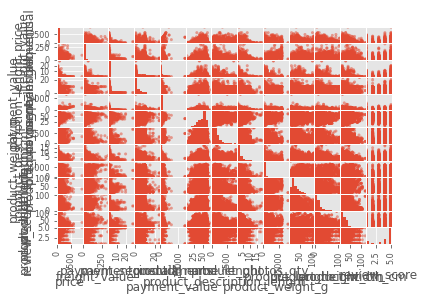

In [32]:
# let's see how pairwise plot looks for some of the data
from pandas.plotting import scatter_matrix

ax = scatter_matrix(olist_continuous)



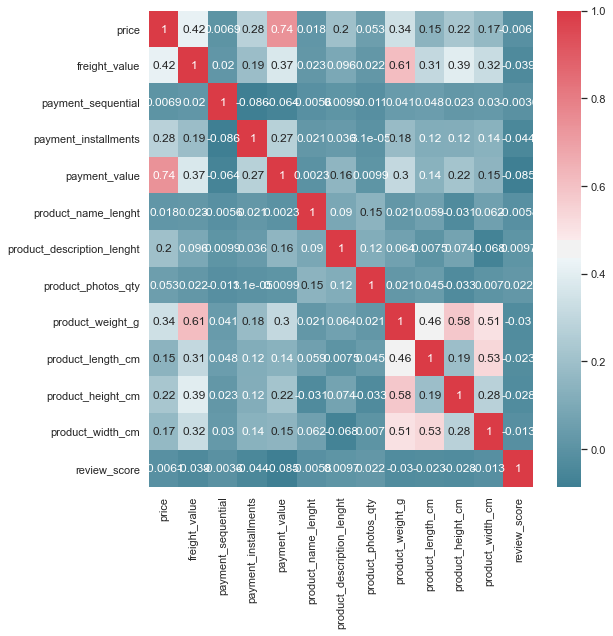

In [33]:
# let's try a heatmap
# plot the correlation matrix using seaborn 
# sns.corrplot() was depricated with v0.6!!!
sns.set(style="darkgrid") # one of the many styles to plot using

cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

f, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(olist.corr(), cmap=cmap, annot=True)

f.tight_layout()

Looks like price correlates with payment_value
Product_weight_g with freight_value
product_height with weight
product_width with weight
product_length with width
